# Thư viện và File

## Cài đặt thư viện

In [4]:
!pip install xlrd==1.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re 
import string 
import nltk
import warnings
import random

from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud 
from collections import Counter
import matplotlib.pyplot as plt
from importlib import reload

from nltk.classify import NaiveBayesClassifier
from nltk.classify import SklearnClassifier
from sklearn.linear_model import LogisticRegression
from nltk.metrics import ConfusionMatrix
from sklearn.model_selection import train_test_split
from nltk.metrics.scores import precision, recall
warnings.filterwarnings('ignore')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download("stopwords")
stop_words=stopwords.words("english")
new_stopping_words = stop_words[:len(stop_words)-36]
new_stopping_words.remove("not")
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

## Đọc File

In [6]:
df = pd.read_csv('/content/Womens Clothing E-Commerce Reviews.csv', index_col=0)
df.head(10)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits
8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses
9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses


#1. EDA - Exploratory Data Analysis

##Tìm hiểu bộ dữ liệu

In [7]:
print('Các cột hiện có của bộ dữ liệu:')
for x in df.columns:
    print('>',x)
print('\nSố dòng của bộ dữ liệu:',len(df))

Các cột hiện có của bộ dữ liệu:
> Clothing ID
> Age
> Title
> Review Text
> Rating
> Recommended IND
> Positive Feedback Count
> Division Name
> Department Name
> Class Name

Số dòng của bộ dữ liệu: 23486


**Giải thích các biến:**
1. Clothing ID: Mã sản phẩm
2. Age: Tuổi của khách hàng
3. Title: Tiêu đề bài review
4. Review Text: Nội dung bài review
5. Rating: Đánh giá (từ 1-5 sao)
6. Recommended IND: Biến nhị phân cho biết sản phẩm có được recommend hay không (1 = recommended, 0 = unrecommended)
7. Positive Feedback Count: Số lượng khách hàng khác nhận thấy đánh giá này là tích cực.
8. Division Name: Tên phân loại sản phẩm
9. Department Name: Tên bộ phận của sản phẩm
10. Class Name: Tên phân lớp sản phẩm

##Data Visualization

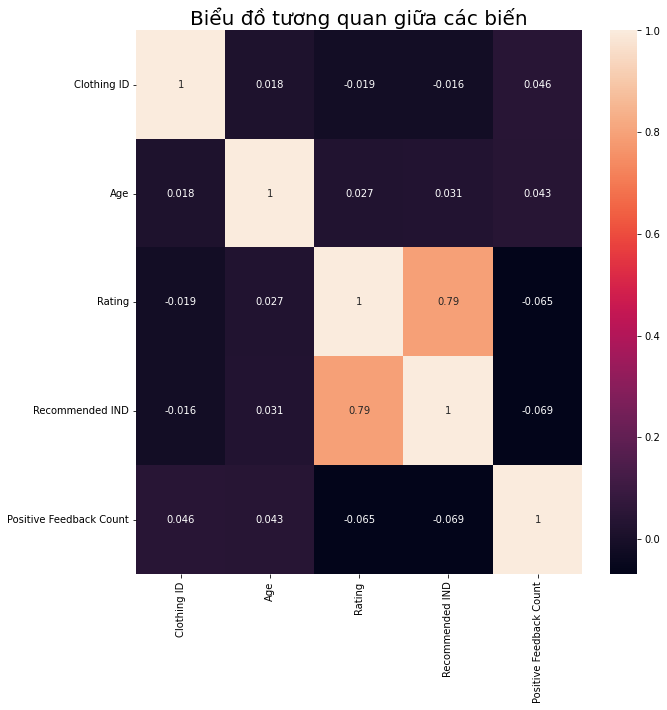

In [8]:
# Tương quan giữa các biến 
corr = df.corr()
fig = plt.figure(figsize = ([10,10]))
sns.heatmap(corr, annot= True)
plt.title('Biểu đồ tương quan giữa các biến',size = 20)
plt.show()

Ta thấy biến Rating và Recommended IND có độ tương quan cao với nhau (0.79)

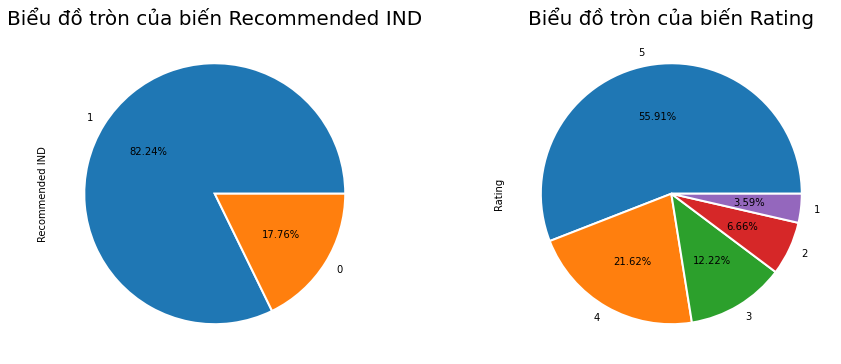

In [9]:
plt.figure(figsize = (15, 6))

# Biểu đồ tròn biến Recommended IND
plt.subplot(1, 2, 1)
plt.title('Biểu đồ tròn của biến Recommended IND', size = 20)
df['Recommended IND'].value_counts().plot.pie(autopct='%1.2f%%', wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' })

# Biểu đồ tròn biến Rating
plt.subplot(1, 2, 2)
plt.title('Biểu đồ tròn của biến Rating', size = 20)
df['Rating'].value_counts().plot.pie(autopct='%1.2f%%', wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' } )
plt.show()

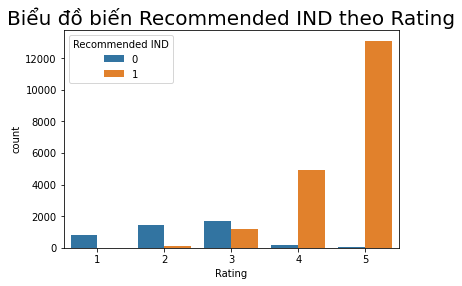

In [10]:
# Vẽ biểu đồ Biểu đồ biến Recommended IND theo Rating
sns.countplot(x='Rating', hue='Recommended IND',data=df)
plt.title('Biểu đồ biến Recommended IND theo Rating',size = 20)
sns.set(rc={'figure.figsize':(10,8)})
plt.show()

In [11]:
df['Department Name'].value_counts()


Tops        10468
Dresses      6319
Bottoms      3799
Intimate     1735
Jackets      1032
Trend         119
Name: Department Name, dtype: int64

In [12]:
df.groupby(['Department Name', 'Recommended IND'])['Recommended IND'].count()

Department Name  Recommended IND
Bottoms          0                   565
                 1                  3234
Dresses          0                  1212
                 1                  5107
Intimate         0                   260
                 1                  1475
Jackets          0                   169
                 1                   863
Tops             0                  1935
                 1                  8533
Trend            0                    31
                 1                    88
Name: Recommended IND, dtype: int64

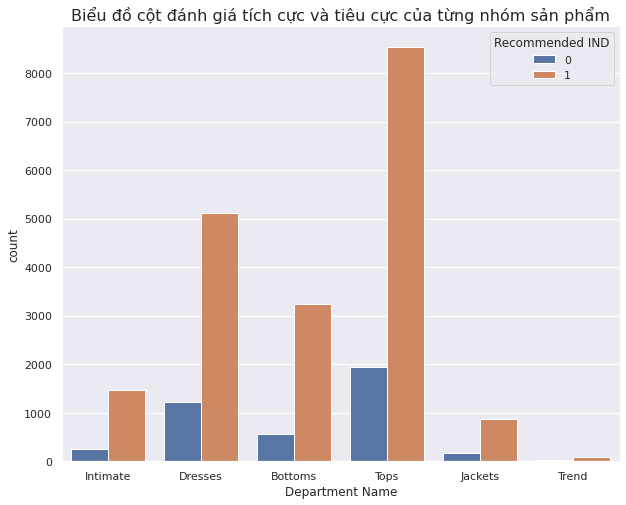

In [13]:
# Số đánh giá tích cực và tiêu cực của từng nhóm sản phẩm
ax = sns.countplot(x='Department Name', hue='Recommended IND',data=df)
plt.title('Biểu đồ cột đánh giá tích cực và tiêu cực của từng nhóm sản phẩm',size = 16)
sns.set(rc={'figure.figsize':(10,8)})
plt.show()

#2. Tiền xử lý dữ liệu

##Missing Values

In [14]:
print('Số giá trị bị thiếu của các cột :\n', len(df) - df.count())

Số giá trị bị thiếu của các cột :
 Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64


In [15]:
# Xóa dữ liệu bị thiếu
df.dropna(inplace= True)
df.isna().sum()

Clothing ID                0
Age                        0
Title                      0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

##Lọc sản phẩm có số lượng review < 5

In [16]:
# Đếm số lượng review trên từng sản phẩm (Clothing ID)
review_count = df['Clothing ID'].value_counts()

print('Số lượng review nhiều nhất trên 1 sản phẩm:', review_count.max())
print('Số lượng review ít nhất trên 1 sản phẩm:', review_count.min())


Số lượng review nhiều nhất trên 1 sản phẩm: 871
Số lượng review ít nhất trên 1 sản phẩm: 1


In [17]:
# Chỉ giữ lại những sản phẩm có số lượng review > 5
df = df.groupby('Clothing ID').filter(lambda x : x['Clothing ID'].shape[0]>5)

In [18]:
review_count = df['Clothing ID'].value_counts()

print('Số lượng review nhiều nhất trên mỗi sản phẩm:', review_count.max())
print('Số lượng review ít nhất trên mỗi sản phẩm:', review_count.min())

Số lượng review nhiều nhất trên mỗi sản phẩm: 871
Số lượng review ít nhất trên mỗi sản phẩm: 6


##Tạo dataframe 'text_df'

Yêu cầu đồ án là Phân tích đánh giá của khách hàng về sản phẩm (tích cực và tiêu cực).

Vì vậy ta sẽ tạo dataframe mới 'text_df' để xử lý trên các biến: Recommended IND, Review Text, Title.

Với biến Recommended IND là biến target phân loại 

In [19]:
# Tạo dataframe 'text_df' gồm 3 biến Title, Review Text và Recommended IND
text_df = df[['Title', 'Review Text', 'Recommended IND']]
text_df.head()

,Title,Review Text,Recommended IND
2,Some major design flaws,I had such high hopes for this dress and reall...,0
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",1
5,Not for the very petite,"I love tracy reese dresses, but this one is no...",0
6,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1
7,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",1


Gộp 2 biến Title và Review Text 

In [20]:
# Tạo biến mới 'Review' được gộp từ Title và Review Text
text_df['Review'] = text_df['Title'] + ' ' + text_df['Review Text']

# Drop 2 biến Title và Review Text cũ
text_df = text_df.drop(labels=['Title','Review Text'] , axis=1)
text_df.head()

,Recommended IND,Review
2,0,Some major design flaws I had such high hopes ...
3,1,"My favorite buy! I love, love, love this jumps..."
5,0,Not for the very petite I love tracy reese dre...
6,1,Cagrcoal shimmer fun I aded this in my basket ...
7,1,"Shimmer, surprisingly goes with lots I ordered..."


In [21]:
# Đổi tên biến 'Recommended IND' thành Recommended
text_df = text_df.rename(columns={"Recommended IND": "Recommended"})
text_df.head()

,Recommended,Review
2,0,Some major design flaws I had such high hopes ...
3,1,"My favorite buy! I love, love, love this jumps..."
5,0,Not for the very petite I love tracy reese dre...
6,1,Cagrcoal shimmer fun I aded this in my basket ...
7,1,"Shimmer, surprisingly goes with lots I ordered..."


In [22]:
text_df['Recommended'].value_counts()

1    14878
0     3328
Name: Recommended, dtype: int64

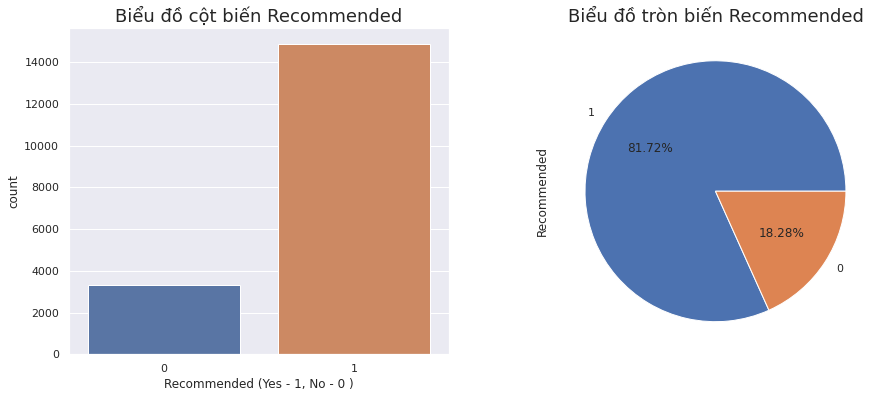

In [23]:
plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
sns.countplot(x=text_df['Recommended'])
plt.xlabel('Recommended (Yes - 1, No - 0 )')
plt.title('Biểu đồ cột biến Recommended', size = 18)

plt.subplot(1, 2, 2)
plt.title('Biểu đồ tròn biến Recommended', size = 18)
text_df['Recommended'].value_counts().plot.pie(autopct='%1.2f%%')
plt.show()

##Resampling (Lấy mẫu lại)

Biến phân loại Recommended có có sự chênh lệch khá lớn trong phân phối của 2 giá trị 0 và 1.

Vì vậy nhóm sẽ tiến hành resampling để giúp cho mô hình phân lớp tránh bị thiên lệch.


Đồng thời trong quá trình thử nghiệm, nhóm nhận thấy mô hình Naive Bayes của thư viện NLTK có tốc độ xử lý khá chậm. Vì vậy nhóm sẽ downsampling bộ dữ liệu xuống để cải thiện tốc độ.

In [24]:
from sklearn.utils import resample

In [25]:
# Tạo 2 dataframe ứng với Recommend = 1 và = 0 
df_majority = text_df[(text_df['Recommended']==1)] 
df_minority = text_df[(text_df['Recommended']==0)] 

# resample df_majority  
df_majority_resampled = resample(df_majority, 
                                 replace=True,  
                                 n_samples=len(df_minority), #downsampling 
                                 random_state=40)  
   
# Kết hợp df minority và df majority đã resampled
df_resampled = pd.concat([df_minority, df_majority_resampled])

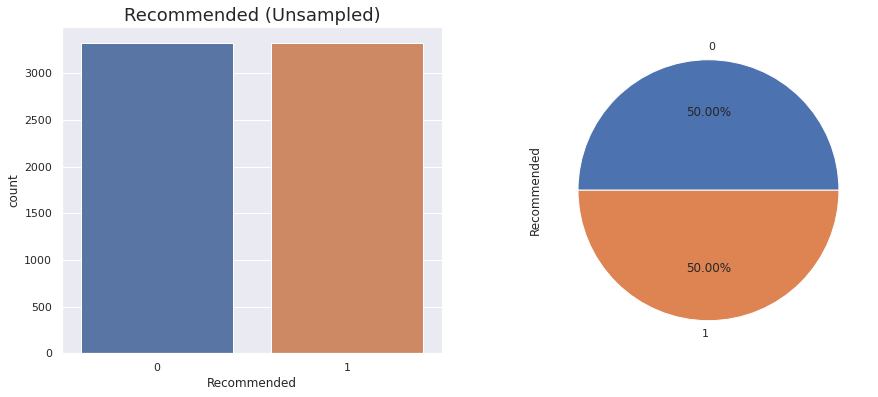

In [26]:
plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
sns.countplot(x=df_resampled['Recommended'])
plt.title('Recommended (Unsampled)',size = 18)

plt.subplot(1, 2, 2)
df_resampled['Recommended'].value_counts().plot.pie(autopct='%1.2f%%')


##Xử lý biến text

In [27]:
# Hàm xử lý biến text đầu vào
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [28]:
df_resampled["Cleaned_Review"] = np.vectorize(remove_pattern)(df_resampled["Review"], "@[\w]*")

In [29]:
# Xóa các ký tự đặc biệt, số và dấu chấm câu
df_resampled["Cleaned_Review"] = df_resampled["Cleaned_Review"].str.replace("[^a-zA-Z#]", " ")
df_resampled.head()


,Recommended,Review,Cleaned_Review
2,0,Some major design flaws I had such high hopes ...,Some major design flaws I had such high hopes ...
5,0,Not for the very petite I love tracy reese dre...,Not for the very petite I love tracy reese dre...
10,0,Dress looks like it's made of cheap material D...,Dress looks like it s made of cheap material D...
22,0,"Not what it looks like First of all, this is n...",Not what it looks like First of all this is n...
26,0,Huge disappointment I have been waiting for th...,Huge disappointment I have been waiting for th...


In [30]:
# Xóa từ quá ngắn (từ có độ dài nhỏ hơn 3)
df_resampled["Cleaned_Review"] = df_resampled["Cleaned_Review"].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df_resampled.head()


,Recommended,Review,Cleaned_Review
2,0,Some major design flaws I had such high hopes ...,Some major design flaws such high hopes this d...
5,0,Not for the very petite I love tracy reese dre...,very petite love tracy reese dresses this very...
10,0,Dress looks like it's made of cheap material D...,Dress looks like made cheap material Dress run...
22,0,"Not what it looks like First of all, this is n...",what looks like First this pullover styling th...
26,0,Huge disappointment I have been waiting for th...,Huge disappointment have been waiting this swe...


#3. Text Mining

In [31]:
def cleaning(data):
    
    #1. Tokenize
    text_tokens = word_tokenize(data.replace("'", "").lower()) 
        
    #2. Remove Puncs
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]  
    
    #3. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #4. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
        
    #joining
    return " ".join(text_cleaned)

In [32]:
df_resampled["Cleaned_Review"] = df_resampled["Cleaned_Review"].apply(cleaning)
df_resampled["Cleaned_Review"].head()

2     major design flaw high hope dress really wante...
5     petite love tracy reese dress petite foot tall...
10    dress look like made cheap material dress run ...
22    look like first pullover styling side zipper p...
26    huge disappointment waiting sweater coat ship ...
Name: Cleaned_Review, dtype: object

In [33]:
rare_words = pd.Series(" ".join(df_resampled["Cleaned_Review"]).split()).value_counts()
rare_words

dress      4117
love       2745
size       2708
like       2622
look       2457
           ... 
plainer       1
groom         1
poetic        1
row           1
sotra         1
Length: 7065, dtype: int64

In [34]:
rare_words = rare_words[rare_words <= 2] 

In [35]:
rare_words.index

Index(['coal', 'solves', 'prefered', 'simultaneously', 'widen', 'shee',
       'caved', 'rustic', 'timely', 'community',
       ...
       'housewife', 'xxxxxs', 'exists', 'leap', 'streamline', 'plainer',
       'groom', 'poetic', 'row', 'sotra'],
      dtype='object', length=3798)

In [36]:
df_resampled["Cleaned_Review"] = df_resampled["Cleaned_Review"].apply(lambda x: " ".join([i for i in x.split() if i not in rare_words.index]))
df_resampled["Cleaned_Review"].head()

2     major design flaw high hope dress really wante...
5     petite love tracy reese dress petite foot tall...
10    dress look like made cheap material dress run ...
22    look like first pullover styling side zipper p...
26    huge disappointment waiting sweater coat ship ...
Name: Cleaned_Review, dtype: object

#4. WordCloud

## Top 200 từ xuất hiện nhiều nhất trong Dataset 

In [37]:
import plotly.express as px
FreqOfWords = df_resampled["Cleaned_Review"].str.split(expand=True).stack().value_counts()
FreqOfWords_top200 = FreqOfWords[:200]

fig = px.treemap(FreqOfWords_top200, path=[FreqOfWords_top200.index], values=0, width=1200, height=700)
fig.update_layout(title_text='Top 200 từ xuất hiện nhiều trong Dataset (After Cleaning)',
                  title_x=0.5, title_font=dict(size=20)
                  )
fig.update_traces(textinfo="label+value")
fig.show()

## WordCloud của tất cả đánh giá của khách hàng

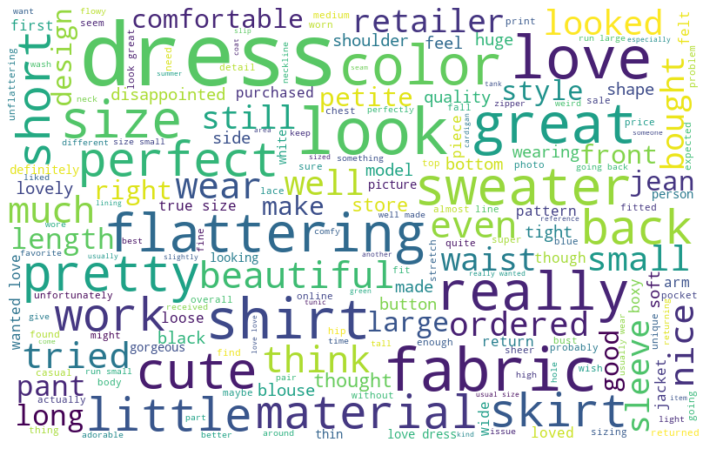

In [38]:
all_words = " ".join([sentence for sentence in df_resampled["Cleaned_Review"]]) 

from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white', width = 800, height = 500, random_state = 42, max_font_size = 100).generate(all_words)

plt.figure(figsize = (15, 8))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()


## WordCloud về những đánh giá tích cực của khách hàng

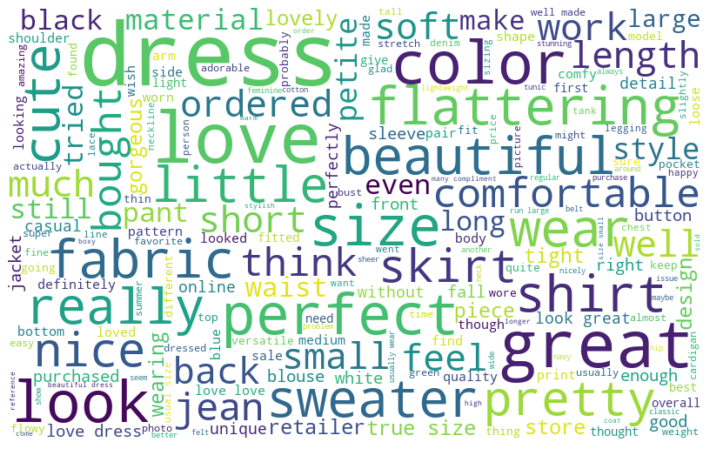

In [39]:
all_words = " ".join([sentence for sentence in df_resampled["Cleaned_Review"][df_resampled["Recommended"]==1]]) 

wordcloud = WordCloud(background_color='white', width = 800, height = 500, random_state = 42, max_font_size = 100).generate(all_words)

plt.figure(figsize = (15, 8))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

## WordCloud về những đánh giá tiêu cực của khách hàng

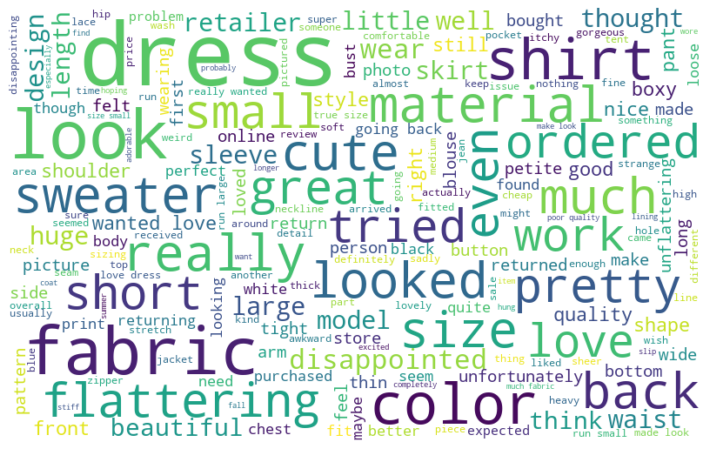

In [40]:
all_words = " ".join([sentence for sentence in df_resampled["Cleaned_Review"][df_resampled["Recommended"]==0]]) 

wordcloud = WordCloud(background_color='white', width = 800, height = 500, random_state = 42, max_font_size = 100).generate(all_words)

plt.figure(figsize = (15, 8))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()


#5. Sentiment Classification

##Train-Test split

In [41]:
df_cleaned_resampled = df_resampled.drop(['Review'], axis = 1)


In [42]:
df_cleaned_resampled 

,Recommended,Cleaned_Review
2,0,major design flaw high hope dress really wante...
5,0,petite love tracy reese dress petite foot tall...
10,0,dress look like made cheap material dress run ...
22,0,look like first pullover styling side zipper p...
26,0,huge disappointment waiting sweater coat ship ...
...,...,...
5499,1,dress dress closet ordered little short taste ...
9986,1,simple cute dress still look good wear legging...
9652,1,amazing work pant bought pant green black comf...
4856,1,close like another reviewer really wanted love...


In [43]:
train, test = train_test_split(df_cleaned_resampled,test_size = 0.1)

In [44]:
# Tạo 2 mảng tách train sets theo positive, negative
train_pos = []
train_neg = []

for index, row in train.iterrows():
    if row['Recommended'] == 1:
        train_pos.append(row)
    elif row['Recommended'] == 0:
        train_neg.append(row)

# Tạo mảng review
reviews = []
for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.Cleaned_Review.split() if len(e) >= 3]
    reviews.append((words_filtered,row.Recommended))

# Tạo 2 mảng tách test sets theo positive, negative
test_pos = []
test_neg = []

for index, row in test.iterrows():
    if row['Recommended'] == 1:
        test_pos.append(row)
    elif row['Recommended'] == 0:
        test_neg.append(row)

In [45]:
def get_words_in_reviews(reviews):
    all = []
    for (words, recommended) in reviews:
        all.extend(words)
    return all

def get_words_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features

w_features = get_words_features(get_words_in_reviews(reviews))

def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['containts(%s)' % word] = (word in document_words)
    return features

## Naive Bayes Classifier

In [46]:
# Huấn luyện mô hình Naive Bayes
training_set = nltk.classify.apply_features(extract_features,reviews)
naivebayesclassifier = nltk.NaiveBayesClassifier.train(training_set)

In [47]:
# Đánh giá độ chính xác của mô hình training so với test sets
neg_cnt = 0
pos_cnt = 0
for obj in test_neg: 
    res =  naivebayesclassifier.classify(extract_features(obj.Cleaned_Review.split()))
    if(res == 0): 
        neg_cnt = neg_cnt + 1
for obj in test_pos: 
    res =  naivebayesclassifier.classify(extract_features(obj.Cleaned_Review.split()))
    if(res == 1): 
        pos_cnt = pos_cnt + 1
        
print('[Negative]: %s/%s '  % (len(test_neg),neg_cnt))        
print('[Positive]: %s/%s '  % (len(test_pos),pos_cnt)) 

[Negative]: 338/309 
[Positive]: 328/279 


Mô hình phân lớp Naive Bayes có độ chính xác khoảng 91% cho cho các đánh giá negative, và khoảng 85% cho các đánh giá positive


In [48]:
# Hàm trả về most_informative_features
naivebayesclassifier.show_most_informative_features(5)

Most Informative Features
     containts(horrible) = True                0 : 1      =     26.4 : 1.0
        containts(shame) = True                0 : 1      =     26.4 : 1.0
      containts(dressed) = True                1 : 0      =     24.0 : 1.0
containts(disappointment) = True                0 : 1      =     19.5 : 1.0
         containts(poor) = True                0 : 1      =     16.6 : 1.0


Kết quả cho thấy với từ "horrible" có tỷ lệ xuất hiện trong review tiêu cực (0) gấp 26.4 lần so với trong review tích cực (1)

Từ "dressed" có tỷ lệ xuất hiện trong review tích cực (1) gấp 24 lần so với trong review tiêu cực (0)

In [49]:
# Chỉnh sửa lại hàm của nltk để hiển thị kết quả trực quan hơn
def show_most_informative_features_in_list(classifier, n=10):
    cpdist = classifier._feature_probdist       # probability distribution for feature values given labels
    feature_list = []
    for (fname, fval) in classifier.most_informative_features(n):
        def labelprob(l):
            return cpdist[l, fname].prob(fval)
        labels = sorted([l for l in classifier._labels if fval in cpdist[l, fname].samples()], 
                        key=labelprob)
        feature_list.append([fname, labels[-1]])
    return feature_list

In [50]:
show_most_informative_features_in_list(naivebayesclassifier, 10)

[['containts(horrible)', 0],
 ['containts(shame)', 0],
 ['containts(dressed)', 1],
 ['containts(disappointment)', 0],
 ['containts(poor)', 0],
 ['containts(cooler)', 1],
 ['containts(ripped)', 0],
 ['containts(flirty)', 1],
 ['containts(everyday)', 1],
 ['containts(unflattering)', 0]]

In [51]:
Accuracy  = (neg_cnt + pos_cnt)/(len(test_neg)+ len(test_pos)) * 100
Precision = pos_cnt/len(test_pos) * 100
Recall = pos_cnt/(len(test_neg) - neg_cnt + pos_cnt) * 100
F_score = (2 * Precision  * Recall)/(Precision + Recall)
print('[Accuracy]: %s '  % Accuracy)
print('[Precision]: %s '  % Precision)
print('[Recall]: %s '  % Recall)
print('[F-score]: %s '  % F_score)

[Accuracy]: 88.28828828828829 
[Precision]: 85.0609756097561 
[Recall]: 90.5844155844156 
[F-score]: 87.7358490566038 


## Logistic Regression Classifier

In [52]:
# Huấn luyện mô hình Logistic Regression
training_set = nltk.classify.apply_features(extract_features,reviews)
logregressionclassifier = SklearnClassifier(LogisticRegression()).train(training_set)

In [53]:
# Đánh giá độ chính xác của mô hình training so với test sets
neg_cnt = 0
pos_cnt = 0
for obj in test_neg: 
    res =  logregressionclassifier.classify(extract_features(obj.Cleaned_Review.split()))
    if(res == 0): 
        neg_cnt = neg_cnt + 1
for obj in test_pos: 
    res =  logregressionclassifier.classify(extract_features(obj.Cleaned_Review.split()))
    if(res == 1): 
        pos_cnt = pos_cnt + 1
        
print('[Negative]: %s/%s '  % (len(test_neg),neg_cnt))        
print('[Positive]: %s/%s '  % (len(test_pos),pos_cnt)) 

[Negative]: 338/296 
[Positive]: 328/286 


Mô hình phân lớp Logistic Regression có độ chính xác khoảng 88% cho cho các đánh giá negative, và khoảng 87% cho các đánh giá positive


In [54]:
Accuracy  = (neg_cnt + pos_cnt)/(len(test_neg)+ len(test_pos)) * 100
Precision = pos_cnt/len(test_pos) * 100
Recall = pos_cnt/(len(test_neg) - neg_cnt + pos_cnt) * 100
F_score = (2 * Precision  * Recall)/(Precision + Recall)
print('[Accuracy]: %s '  % Accuracy)
print('[Precision]: %s '  % Precision)
print('[Recall]: %s '  % Recall)
print('[F-score]: %s '  % F_score)

[Accuracy]: 87.38738738738738 
[Precision]: 87.1951219512195 
[Recall]: 87.1951219512195 
[F-score]: 87.1951219512195 
